![example](images/director_shot.jpeg)

# Project Title

**Authors:** Jonathan, Matt, Nate, Roshni
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

Microsoft would like open a new movie studio to create original video content. Microsoft wants to know what types of films are currently doing best at the box office. We have generated three actionable insights that will help the head of Microsoft's new movie studio decide on which type of films to create.

* **Which methods did we use?**

* **What are the recommendations?**

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Which type of films should Microsoft's new movie studio create?

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

### Data Prep The Movies Database

#### Importing the data as a dataframe
- Indexing the first column as non-relavent
- parsing dates to convert to datetime/timestamp

In [2]:
df_tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz', index_col = 0, parse_dates=['release_date'])

#### Getting a general idea of what the dataset looks like

In [3]:
df_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [4]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


**Key Takeaways:**
- 26517 rows with 9 columns of information
- No null values
- Need to find a movie genre key to figure out what the genres mean
- Limit the data to the most recent 10 years to stay relavent
    - Can maybe also plot vote_avg vs time to see trends that way?

### Data Cleaning: The Movies Database
#### Removing Unnecessary Columns & Filtering Data
**Columns to drop**
- `popularity`
   - popularity is based on current popularity, not how well the movie performed when released or how it was reviewed
        - https://developers.themoviedb.org/3/getting-started/popularity
    
- `id`
    - just a unique identifier, not relevant

- `original_title`
    - there are two columns for title, we will keep the final title column

In [5]:
df_cleaning = df_tmdb.drop(['popularity', 'id', 'original_title'], axis=1)

**Columns to filter**
- `original_language`
    - Microsoft would make the language in english as the company is based out of the USA
    
- `vote_Count`
    - Microsoft is only interested in a successful movie
    - It can be reasonably assumed that movies with fewer votes are less successful
    - We are dropping any count values below the mean
    
- `release_date`
    - Microsoft is interested in current data trends
        - We will limit the data to the last 10 years of available data (2010-2019)

Making sure that it's only english movies and then dropping the original_language column as it is no longer needed.

In [6]:
df_filtered = df_cleaning[df_cleaning['original_language'] == 'en']
df_filtered = df_filtered.drop('original_language', axis=1)

**Drop Certain Movies**

Dropping movies with a vote count below 200 votes.
(I chose this value as it is roughly the avg of the number of votes in the dataset)

In [7]:
df_filtered['vote_count'].describe()

count    23291.000000
mean       209.307887
std       1016.214512
min          1.000000
25%          1.000000
50%          4.000000
75%         24.000000
max      22186.000000
Name: vote_count, dtype: float64

In [8]:
df_filtered = df_filtered[df_filtered['vote_count'] > 200]

Limiting the number of movies to those released in 2010 and after.

In [9]:
df_filtered = df_filtered[df_filtered['release_date'] > pd.Timestamp(2010, 1, 1)]
df_filtered

,genre_ids,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
...,...,...,...,...,...
24369,"[18, 36, 35]",2017-11-22,The Man Who Invented Christmas,6.6,323
24383,[27],2018-10-05,Malevolent,5.0,236
24409,"[9648, 53]",2017-10-27,All I See Is You,4.9,311
24422,"[35, 18]",2018-02-16,The Party,6.4,229


We are left with the table `df_filtered` that has 2318 rows and 5 columns of relevant information

### Understanding the Data

**Making sense of the genre_ids**

We can see that the genre ID's are in order of best fit rather than numerical or alphabetical order
- For index 0: `genre_ids` = [12, 14, 10751]
- For index 1: `genre_ids` = [14, 12, 16, 10751]

We will take the primary and secondary Genre_ids from the list to get a better idea of which Genre's relate to the count

**Determining the data type for genre_ids**

Checking the type of data for genre_ids below. Goal is to create new columns with primary and secondary genres.

In [10]:
print(df_filtered['genre_ids'][0])
print(type(df_filtered['genre_ids'][0]))

[12, 14, 10751]
<class 'str'>


The data in genre_ids looks like a list, but is really a string including brackets. Let's clean this up.

**Created a for-loop that runs through each row of the column 'genre_ids'**

The for-loop:
 - First converts the string to a list of int.
 - Then it takes each int and assigns it to a new list corresponding to it's position in the original `genre_ids` list.
 - If there is no value for that iteration, it populates the list with `None`.
 - I include nonetype so that they stay on point with the correct index.

In [11]:
char_remove = ["'", " ", "[", "]"]

first_genre = []
second_genre = []

for x in df_filtered['genre_ids']:
    row = x
    for char in char_remove:
        row = row.replace(char, '')
    row = row.split(',')
    first_genre.append(row[0])
        
    if len(row) == 1:
        second_genre.append(None)
    if len(row) >= 2:
        second_genre.append(row[1])

**Now that we have lists of primary and secondary genre's we can turn them into columns.**

In [12]:
df_filtered['primary_genre'] = first_genre
df_filtered['secondary_genre'] = second_genre
df_filtered

,genre_ids,release_date,title,vote_average,vote_count,primary_genre,secondary_genre
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12,14
1,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610,14,12
2,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368,12,28
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186,28,878
5,"[12, 14, 10751]",2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,12,14
...,...,...,...,...,...,...,...
24369,"[18, 36, 35]",2017-11-22,The Man Who Invented Christmas,6.6,323,18,36
24383,[27],2018-10-05,Malevolent,5.0,236,27,None
24409,"[9648, 53]",2017-10-27,All I See Is You,4.9,311,9648,53
24422,"[35, 18]",2018-02-16,The Party,6.4,229,35,18


**Converting the genre_ids codes to something more understandable**

I found the below movie genre key on The MovieDB website. The key is important so that we can understand what the genre_id code actually means.

(found at: https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)

In [13]:
backwards_key = {
'Action' : '28',
'Adventure' : '12',
'Animation' : '16',
'Comedy' : '35',
'Crime' : '80',
'Documentary' : '99',
'Drama' : '18',
'Family' : '10751',
'Fantasy' : '14',
'History' : '36',
'Horror' : '27',
'Music' : '10402',
'Mystery' : '9648',
'Romance' : '10749',
'Science Fiction' : '878',
'TV Movie' : '10770',
'Thriller' : '53',
'War' : '10752',
'Western' : '37'
}

genre_key = {v: k for k, v in backwards_key.items()}
# print(genre_key)

**Now to put the key to work and change the columns from numbers to english**

In [14]:
df_filtered["primary_genre"].replace(genre_key, inplace=True)
df_filtered["secondary_genre"].replace(genre_key, inplace=True)
df_filtered

,genre_ids,release_date,title,vote_average,vote_count,primary_genre,secondary_genre
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,Fantasy
1,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,Adventure
2,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368,Adventure,Action
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186,Action,Science Fiction
5,"[12, 14, 10751]",2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Adventure,Fantasy
...,...,...,...,...,...,...,...
24369,"[18, 36, 35]",2017-11-22,The Man Who Invented Christmas,6.6,323,Drama,History
24383,[27],2018-10-05,Malevolent,5.0,236,Horror,None
24409,"[9648, 53]",2017-10-27,All I See Is You,4.9,311,Mystery,Thriller
24422,"[35, 18]",2018-02-16,The Party,6.4,229,Comedy,Drama


**For our later data analysis, lets combine the two genres into a list of lists that we will add as a third column**

We are going to sort these so that our genre combos come out in the same order, regardless of primary/secondary for easy charting.

1) Merge primary and secondary into a list of lists

In [15]:
merged_genre = [list(x) for x in zip(list(df_filtered['primary_genre']), list(df_filtered['secondary_genre']))]

2) Remove any None type from the list of lists for the secondary genres

In [16]:
for genre in merged_genre:
    if genre[1] == None:
        genre.pop()

3) Sort the list based on the values for each list (each row) within the total list

In [17]:
for genre in merged_genre:
    genre.sort()

**Now that we have a list of the combined genres, we can turn it into a column.**

In [18]:
df_filtered['combined_genres'] = merged_genre
df_filtered

,genre_ids,release_date,title,vote_average,vote_count,primary_genre,secondary_genre,combined_genres
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,Fantasy,"[Adventure, Fantasy]"
1,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,Adventure,"[Adventure, Fantasy]"
2,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368,Adventure,Action,"[Action, Adventure]"
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186,Action,Science Fiction,"[Action, Science Fiction]"
5,"[12, 14, 10751]",2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Adventure,Fantasy,"[Adventure, Fantasy]"
...,...,...,...,...,...,...,...,...
24369,"[18, 36, 35]",2017-11-22,The Man Who Invented Christmas,6.6,323,Drama,History,"[Drama, History]"
24383,[27],2018-10-05,Malevolent,5.0,236,Horror,None,[Horror]
24409,"[9648, 53]",2017-10-27,All I See Is You,4.9,311,Mystery,Thriller,"[Mystery, Thriller]"
24422,"[35, 18]",2018-02-16,The Party,6.4,229,Comedy,Drama,"[Comedy, Drama]"


### Data Prep The Numbers Database

**Importing the Data as a Dataframe**

In [19]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', parse_dates=['release_date'])

#### Remove unnecessary column (ID)

In [20]:
tn_df = tn_df.drop('id', axis=1)

#### Convert Number Variables to Int type

In [21]:
def clean_nums(column_title):
    '''
    Input a column title as a string to remove commas and dollar signs. Return the column as type int.
    '''
    tn_df[column_title].replace(',','', regex=True, inplace=True)
    tn_df[column_title] = tn_df[column_title].map(lambda x: int(x.replace('$','')))

    return tn_df

In [22]:
clean_nums('production_budget')
clean_nums('domestic_gross')
clean_nums('worldwide_gross')

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5777,2018-12-31,Red 11,7000,0,0
5778,1999-04-02,Following,6000,48482,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5780,2015-09-29,A Plague So Pleasant,1400,0,0


#### Excluding Worldwide Gross == 0
- Worldwide Gross of 0 indicates that either the data is missing data or the movie was never released in theaters.

In [23]:
print("Excluding worldwide gross of $0 would remove " + str(round((1 - 5415/5781)*100, 1)) + " percent of datapoints")

#Less than 10% of data is being removed, which meets the rule of thumb


tn_df = tn_df[tn_df['worldwide_gross'] != 0]

tn_df

Excluding worldwide gross of $0 would remove 6.3 percent of datapoints


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644
5776,2004-12-31,The Mongol King,7000,900,900
5778,1999-04-02,Following,6000,48482,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338


#### Calculate Net Profit as a new variable in dataset

Net profit = worldwide gross - production budget

In [24]:
tn_df = tn_df.assign(net_profit = tn_df['worldwide_gross'] - tn_df['production_budget'])
tn_df = tn_df.assign(net_profit = tn_df['worldwide_gross'] - tn_df['production_budget'])
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
0,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [25]:
tn_df['budget_mils'] = tn_df['production_budget'] / 1000000
tn_df['profit_mils'] = tn_df['net_profit']/1000000

### Data Prep The IMDb

Opening up the database and examining the tables:

In order to run this notebook, you will need to download the necessary data file. A zipped version of the file can be downloaded: here.

Download the zipped file into a folder called 'zippedData' within the same folder that this notebook is located. Once this zip file is in located in the zippedData folder, you can run the following cell to unzip it.

In [26]:
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

Run the following cell to confirm that the database file has been downloaded and unzipped to the correct folder:

In [27]:
from os.path import exists
file_exists = exists('zippedData/im.db')
if file_exists:
    print("You have successfully downloaded and unzipped the database file.  Please proceed.")
else:
    print("The database file was not found.  Please ensure that the database file has been downloaded and unzipped into the 'zippedData' folder located in the folder that this Jupyter notebook resides.")

You have successfully downloaded and unzipped the database file.  Please proceed.


First, we want to open up the database and examine the database tables.

In [28]:
import sqlite3

con = sqlite3.connect('zippedData/im.db')
query = """  SELECT * FROM sqlite_master  """
tables = pd.read_sql(query, con)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


**Tables of initial interest:**
1. movie_basics
2. movie_ratings

#### Examine Movie Basics table

In [29]:
query = """  SELECT * FROM movie_basics  """
movie_basics = pd.read_sql(query, con)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [30]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


**Notes:**
- This table has the movie titles, release year, and genres.  The primary key is the movie_id, which is referenced in other tables such as movie basics.
- There appears to be a movie_id, primary title, and start_year for all rows.

#### Examine Movie Ratings table

In [31]:
query = """  SELECT * FROM movie_ratings  """
movie_ratings = pd.read_sql(query, con)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [32]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


**Notes:**
- Movie ratings are only given for 73K of the 146K of movies.  
- Since the ratings are the most important quantitate information from this file, I would suggest we 

#### Merge Tables
- merging `movie_ratings` with `movie_basics` 

In [33]:
movies_with_ratings = pd.merge(movie_ratings, movie_basics, left_on='movie_id', right_on='movie_id')
movies_with_ratings

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


#### Filter Movies
We want to consider the number of votes in our results, as the fewer number of votes a movie rating has will lead to less certainty in the average rating. As such, we decided to cut the analysis to the top half (all movies over the median number of votes, which is 49).

Find the median number of votes in the remaining data set

In [34]:
median_votes = movies_with_ratings['numvotes'].median()
median_votes

49.0

Drop movies with number of votes less than the median

In [35]:
movies_with_ratings_over_median_votes = movies_with_ratings.loc[movies_with_ratings['numvotes']>median_votes]
movies_with_ratings_over_median_votes

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
5,tt1069246,6.2,326,Habana Eva,Habana Eva,2010,106.0,"Comedy,Romance"
6,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport"
7,tt1130982,6.4,571,The Night Clerk,Avant l'aube,2011,104.0,"Drama,Thriller"
...,...,...,...,...,...,...,...,...
73831,tt9558612,3.7,4057,PM Narendra Modi,PM Narendra Modi,2019,136.0,"Biography,Drama"
73832,tt9575726,7.7,161,Ir visi ju vyrai,Ir visi ju vyrai,2019,108.0,"Comedy,Romance"
73833,tt9576110,6.8,65,J'veux du soleil,J'veux du soleil,2019,76.0,Documentary
73844,tt9668598,5.5,317,Musabbar,Musabbar,2019,NaN,"Horror,Thriller"


We now have a dataset of ~37K movies that all have a sufficient number of votes for us to be confident in the average ratings. We can now analyze the dataset.

### Joining DF

Prep The Movies Database to join:

In [36]:
df_tmdb_mod = df_filtered
df_tmdb_mod['movie'] = df_tmdb_mod['title']
df_tmdb_mod = df_tmdb_mod.set_index('movie')
df_tmdb_mod = df_tmdb_mod.drop('genre_ids', axis=1)
df_tmdb_mod.head(1)

,release_date,title,vote_average,vote_count,primary_genre,secondary_genre,combined_genres
movie,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,Fantasy,"[Adventure, Fantasy]"


Prep The Numbers Database to join:

In [37]:
df_tndb_mod = tn_df.set_index('movie')
df_tndb_mod = df_tndb_mod.drop('release_date', axis=1)
df_tndb_mod.head(1)

,production_budget,domestic_gross,worldwide_gross,net_profit,budget_mils,profit_mils
movie,,,,,,
Avatar,425000000,760507625,2776345279,2351345279,425.0,2351.345279


Joining The Movied Database with The Numbers Database

In [38]:
df_tmdb_tn_innerjoin = df_tmdb_mod.join(df_tndb_mod, on='movie', how='inner', lsuffix='tmdb', rsuffix='tn')
df_tmdb_tn_innerjoin

,release_date,title,vote_average,vote_count,primary_genre,secondary_genre,combined_genres,production_budget,domestic_gross,worldwide_gross,net_profit,budget_mils,profit_mils
movie,,,,,,,,,,,,,
How to Train Your Dragon,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,Adventure,"[Adventure, Fantasy]",165000000,217581232,494870992,329870992,165.0,329.870992
Iron Man 2,2010-05-07,Iron Man 2,6.8,12368,Adventure,Action,"[Action, Adventure]",170000000,312433331,621156389,451156389,170.0,451.156389
Inception,2010-07-16,Inception,8.3,22186,Action,Science Fiction,"[Action, Science Fiction]",160000000,292576195,835524642,675524642,160.0,675.524642
Percy Jackson & the Olympians: The Lightning Thief,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Adventure,Fantasy,"[Adventure, Fantasy]",95000000,88768303,223050874,128050874,95.0,128.050874
Toy Story 3,2010-06-17,Toy Story 3,7.7,8340,Animation,Family,"[Animation, Family]",200000000,415004880,1068879522,868879522,200.0,868.879522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
The 15:17 to Paris,2018-02-09,The 15:17 to Paris,5.3,799,Drama,History,"[Drama, History]",30000000,36276286,56096200,26096200,30.0,26.096200
Book Club,2018-05-18,Book Club,6.0,301,Comedy,Romance,"[Comedy, Romance]",10000000,68566296,91113683,81113683,10.0,81.113683
Uncle Drew,2018-06-29,Uncle Drew,6.5,220,Comedy,None,[Comedy],18000000,42469946,46527161,28527161,18.0,28.527161


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

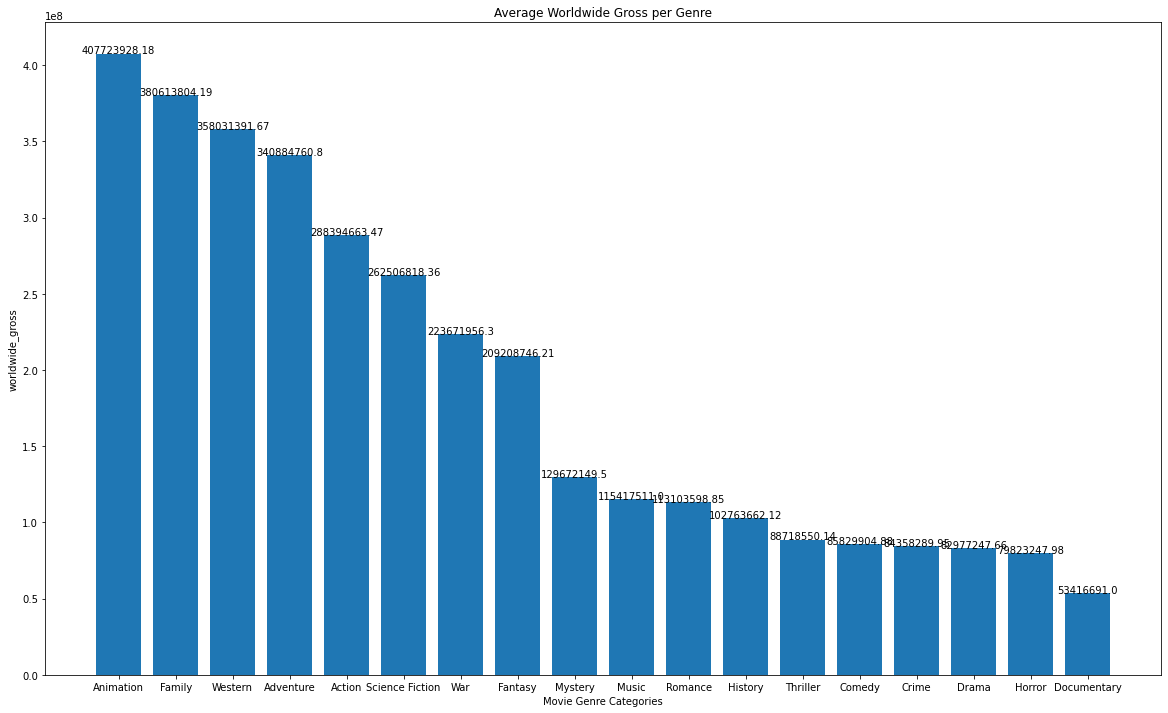

In [39]:
ylabel = df_tmdb_tn_innerjoin.groupby(['primary_genre']).mean().sort_values(by='worldwide_gross', ascending=False)
xlabel = list(df_tmdb_tn_innerjoin.groupby(['primary_genre']).mean().sort_values(by='worldwide_gross', ascending=False).index)

# Setting the figure and figure size
fig, ax = plt.subplots(figsize=(20, 12))

# creating the graph using our xlabel and ylabel that we defined above
ax.bar(x= xlabel, height = ylabel['worldwide_gross'])
# setting axis labels and title
ax.set_title('Average Worldwide Gross per Genre')
ax.set_xlabel('Movie Genre Categories')
ax.set_ylabel('worldwide_gross')
ax.set_ylim()
# setting bar labels for each average value over their respective column
for loc, label in enumerate(ylabel['worldwide_gross']):
    ax.text(loc, label+.15, str(round(label, ndigits=2)), ha='center');

In [40]:
ylabel

,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,net_profit,budget_mils,profit_mils
primary_genre,,,,,,,,
Animation,6.720000,3293.020000,1.016840e+08,1.416414e+08,4.077239e+08,3.060399e+08,101.684000,306.039928
Family,6.293750,3436.187500,7.000000e+07,1.473647e+08,3.806138e+08,3.106138e+08,70.000000,310.613804
Western,7.100000,7505.666667,9.533333e+07,1.232353e+08,3.580314e+08,2.626981e+08,95.333333,262.698058
Adventure,6.457576,4047.070707,1.095384e+08,1.206583e+08,3.408848e+08,2.313464e+08,109.538384,231.346377
Action,6.258333,3859.677536,8.914239e+07,1.057766e+08,2.883947e+08,1.992523e+08,89.142391,199.252272
Science Fiction,6.433333,4875.871795,7.510513e+07,9.911176e+07,2.625068e+08,1.874017e+08,75.105128,187.401690
War,6.590000,3796.900000,6.735000e+07,1.207578e+08,2.236720e+08,1.563220e+08,67.350000,156.321956
Fantasy,6.224242,2605.424242,8.382727e+07,7.592740e+07,2.092087e+08,1.253815e+08,83.827273,125.381473
Mystery,6.264286,3425.428571,3.228571e+07,5.633247e+07,1.296721e+08,9.738644e+07,32.285714,97.386435


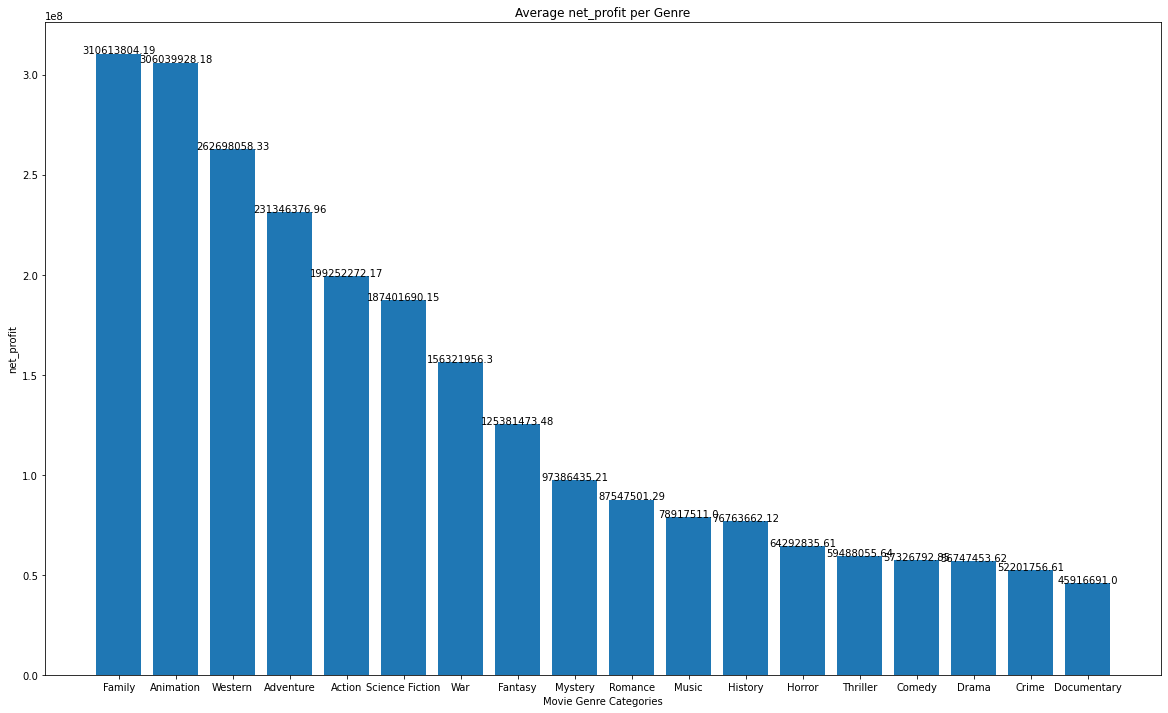

In [41]:
ylabel = df_tmdb_tn_innerjoin.groupby(['primary_genre']).mean().sort_values(by='net_profit', ascending=False)
xlabel = list(df_tmdb_tn_innerjoin.groupby(['primary_genre']).mean().sort_values(by='net_profit', ascending=False).index)

# Setting the figure and figure size
fig, ax = plt.subplots(figsize=(20, 12))

# creating the graph using our xlabel and ylabel that we defined above
ax.bar(x= xlabel, height = ylabel['net_profit'])
# setting axis labels and title
ax.set_title('Average net_profit per Genre')
ax.set_xlabel('Movie Genre Categories')
ax.set_ylabel('net_profit')
ax.set_ylim()
# setting bar labels for each average value over their respective column
for loc, label in enumerate(ylabel['net_profit']):
    ax.text(loc, label+.15, str(round(label, ndigits=2)), ha='center');

In [42]:
df_tmdb_tn_innerjoin.head(1)

,release_date,title,vote_average,vote_count,primary_genre,secondary_genre,combined_genres,production_budget,domestic_gross,worldwide_gross,net_profit,budget_mils,profit_mils
movie,,,,,,,,,,,,,
How to Train Your Dragon,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,Adventure,"[Adventure, Fantasy]",165000000,217581232,494870992,329870992,165.0,329.870992


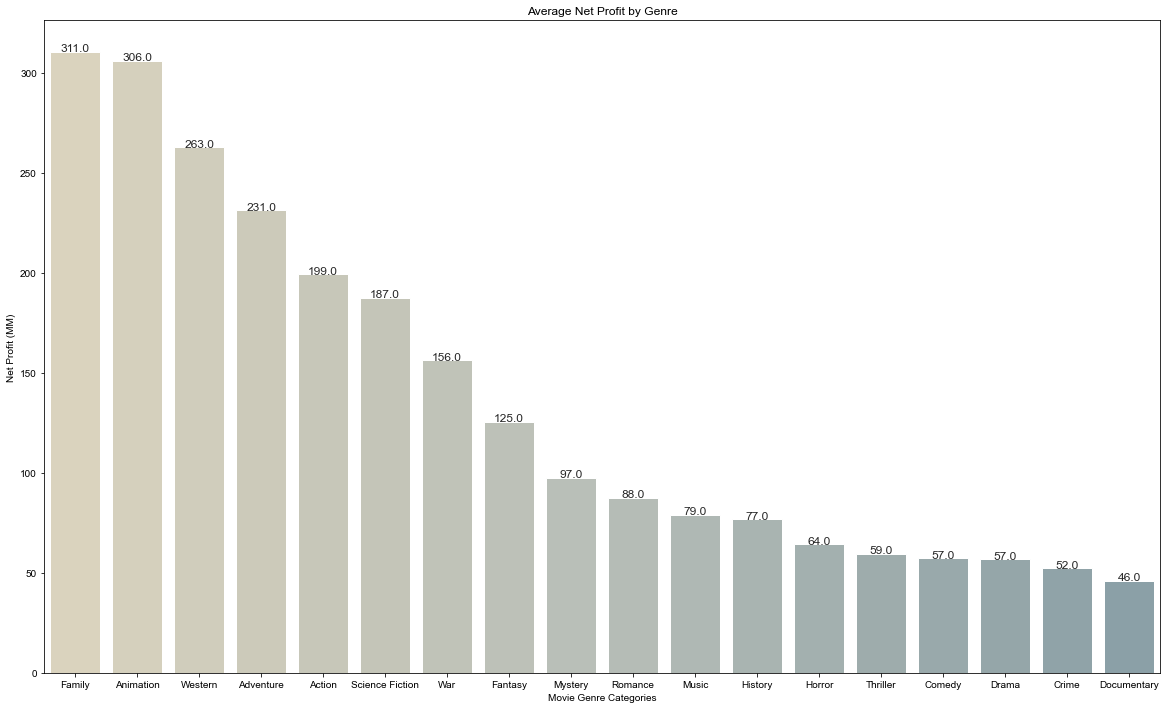

In [43]:
yjoin = df_tmdb_tn_innerjoin.groupby(['primary_genre']).mean().sort_values(by='profit_mils', ascending=False)
xjoin = list(df_tmdb_tn_innerjoin.groupby(['primary_genre']).mean().sort_values(by='profit_mils', ascending=False).index)
fig2, axj = plt.subplots(figsize=(20, 12))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x=xjoin, y=yjoin['profit_mils'], saturation=.4, palette='blend:#EDA,#7AB')

axj.set_title('Average Net Profit by Genre')
axj.set_xlabel('Movie Genre Categories')
axj.set_ylabel('Net Profit (MM)')


for loc, label in enumerate((yjoin['profit_mils'])):
    axj.text(loc, label+.15, str(round(label, ndigits=0)), ha='center');

In [44]:
df_tmdb_tn_innerjoin.head(1)

,release_date,title,vote_average,vote_count,primary_genre,secondary_genre,combined_genres,production_budget,domestic_gross,worldwide_gross,net_profit,budget_mils,profit_mils
movie,,,,,,,,,,,,,
How to Train Your Dragon,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,Adventure,"[Adventure, Fantasy]",165000000,217581232,494870992,329870992,165.0,329.870992


<AxesSubplot:xlabel='vote_average', ylabel='net_profit'>

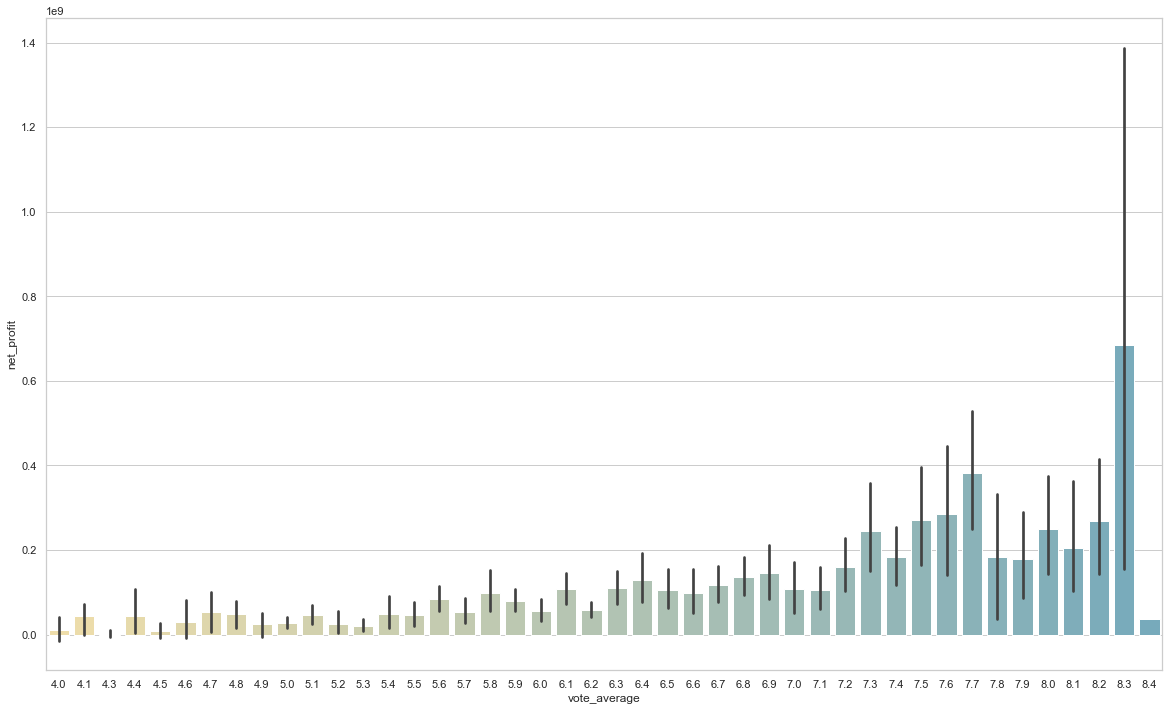

In [45]:
fig3, axj = plt.subplots(figsize=(20, 12))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(data=df_tmdb_tn_innerjoin, x='vote_average', y='net_profit', saturation=1, palette='blend:#EDA,#7AB')

In [46]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***